<a href="https://colab.research.google.com/github/heegeunyoon/python101/blob/main/4_1_sklearn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 사이킷런 LinearRegression을 이용한 캘리포니아 주택 가격 예측

In [ ]:
# 데이터 및 git repository 다운로드
![ ! -d python101 ] && git clone https://github.com/heegeunyoon/python101.git

Cloning into 'python101'...
remote: Enumerating objects: 1240, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 1240 (delta 223), reused 150 (delta 150), pack-reused 965 (from 2)
Receiving objects: 100% (1240/1240), 120.82 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (648/648), done.
Updating files: 100% (77/77), done.


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
import pandas as pd

df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['Price'] = housing.target

print('데이타셋 크기 :', df.shape)
df.head()

데이타셋 크기 : (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- 데이터의 기본적인 특성 확인

In [22]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


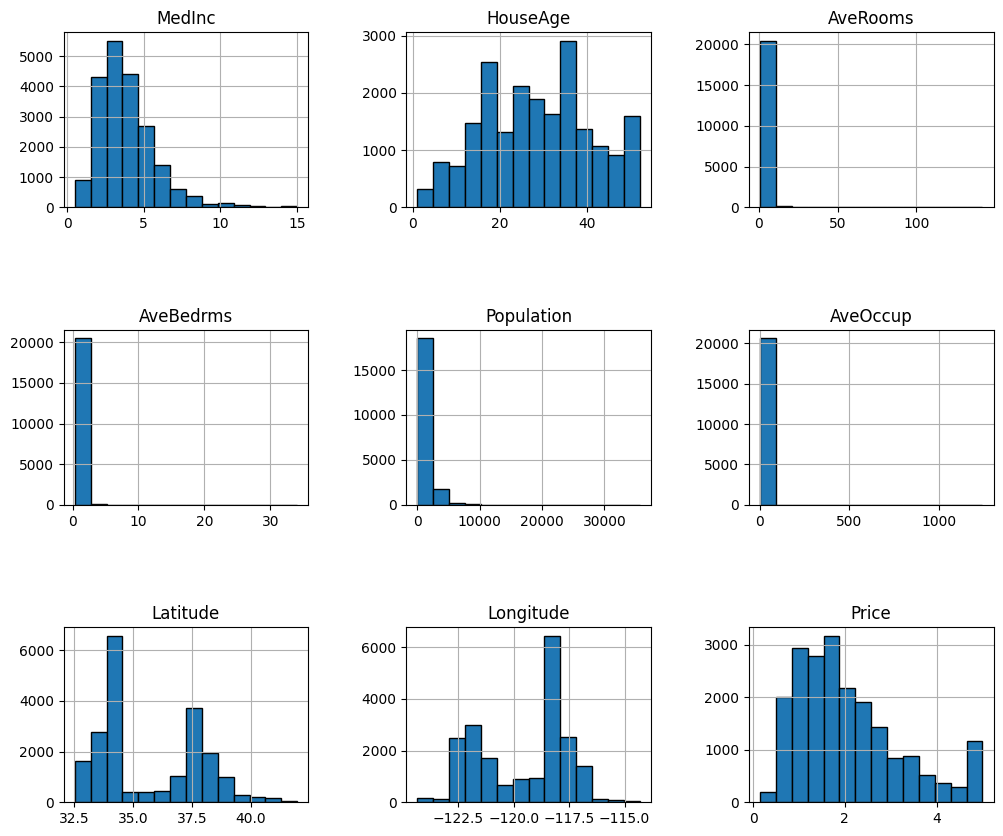

In [23]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10), bins=14, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

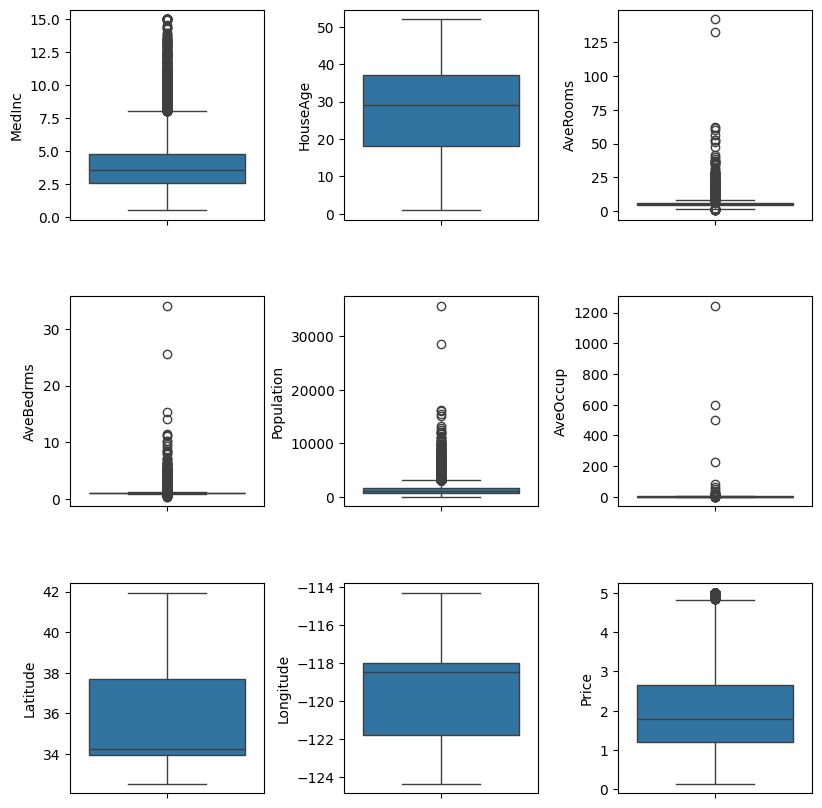

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(8, 8))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

* 각 컬럼별로 주택가격에 미치는 영향도를 조사

<Axes: >

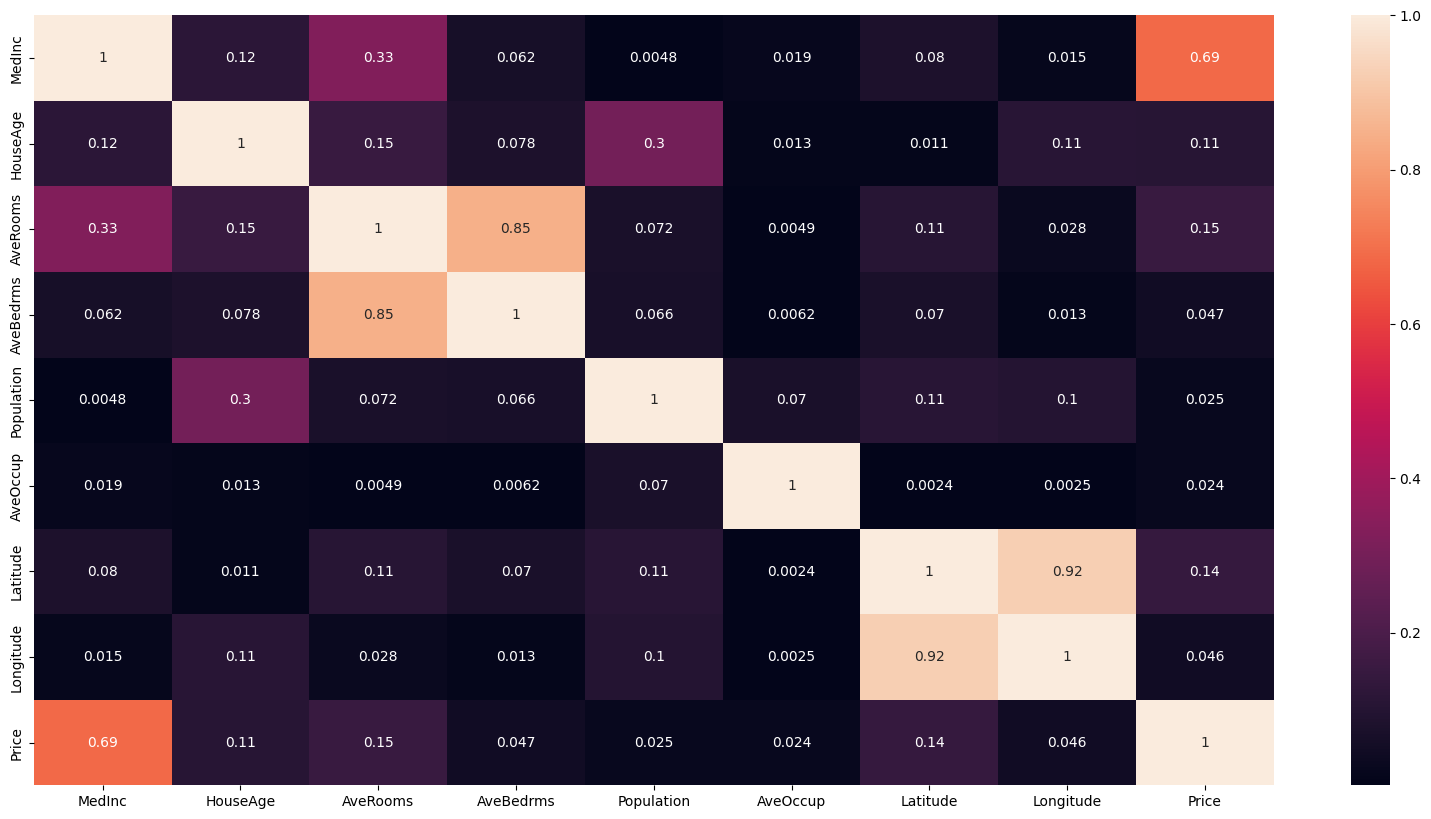

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

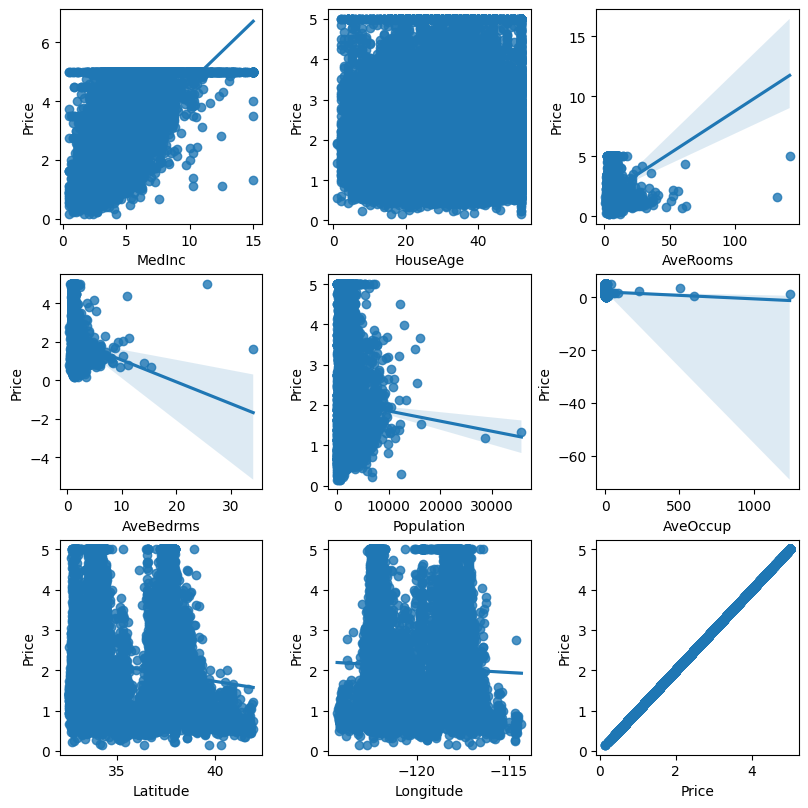

In [28]:
# 3개의 행과 3개의 열을 가진 subplots를 이용. axs는 3x3개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(8,8) , ncols=3, nrows=3)

for i , feature in enumerate(df.columns):
    row = int(i / 3)
    col = i % 3

    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # https://seaborn.pydata.org/generated/seaborn.regplot.html
    sns.regplot(x=feature, y='Price', data=df, ax=axs[row][col], order=1)#, logx=True)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)
fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

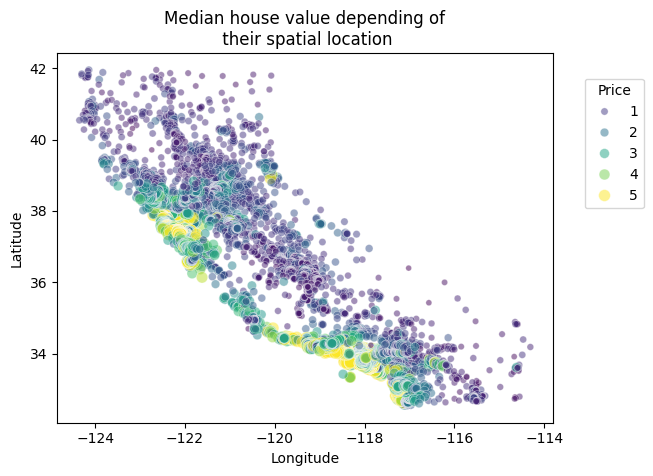

In [7]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="Price",
    hue="Price",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="Price", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

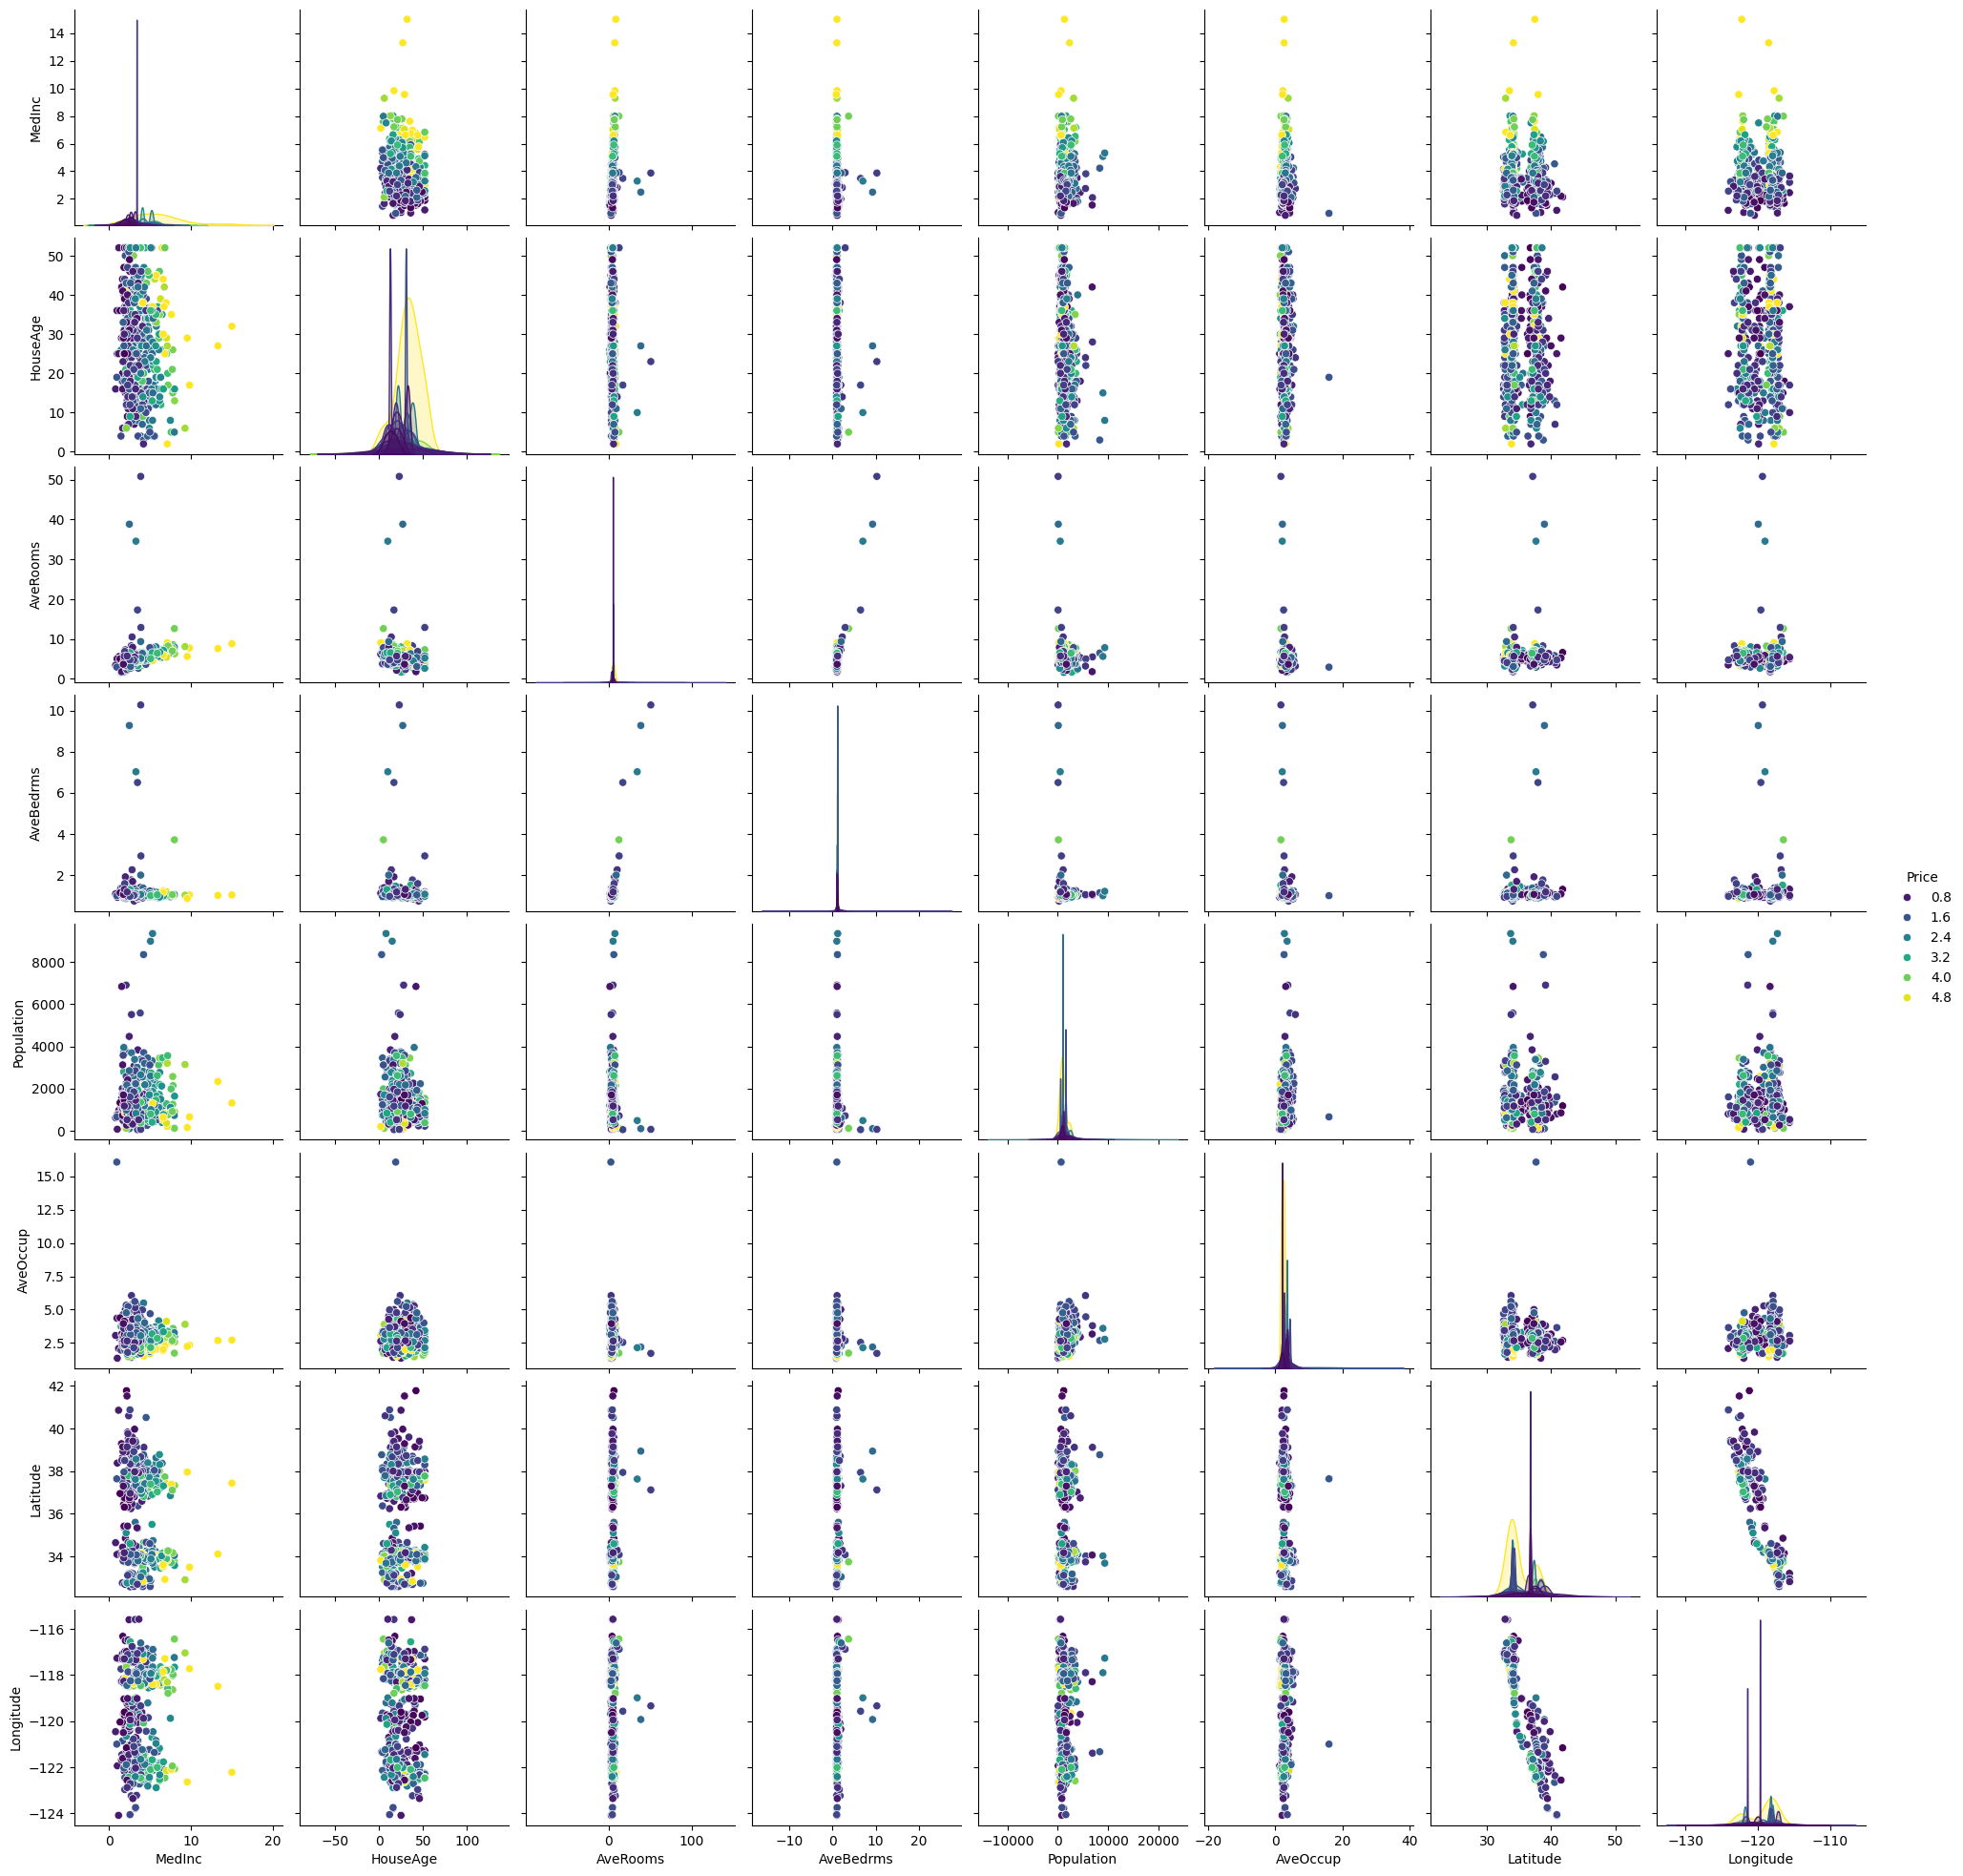

In [8]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(df.shape[0]), size=500, replace=False)

_ = sns.pairplot(data=df.iloc[indices], hue="Price", palette="viridis")

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = df['Price']
X_data = df.drop(['Price'],axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size=0.2, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.558 , RMSE : 0.747
Variance score : 0.581


In [12]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -36.74355727491055
회귀 계수값: [ 0.4  0.  -0.1  0.6  0.  -0.  -0.4 -0.4]


In [13]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

,0
AveBedrms,0.6
MedInc,0.4
HouseAge,0.0
Population,0.0
AveOccup,-0.0
AveRooms,-0.1
Latitude,-0.4
Longitude,-0.4


In [14]:
from sklearn.model_selection import cross_val_score

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.48 -0.62 -0.65 -0.54 -0.49]
 5 folds 의 개별 RMSE scores :  [0.7  0.79 0.8  0.74 0.7 ]
 5 folds 의 평균 RMSE : 0.746 
